In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N=1000
D=2

In [0]:
R_inner=5
R_outer=10

In [0]:
R1=np.random.randn(int(N/2)) + R_inner
theta=2*np.pi*np.random.randn(int(N/2))
X_inner=np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T
R2=np.random.randn(int(N/2)) + R_outer
theta=2*np.pi*np.random.randn(int(N/2))
X_outer=np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T
X=np.concatenate([X_inner,X_outer])
T=np.array([0]*(int(N/2))+[1]*(int(N/2)))



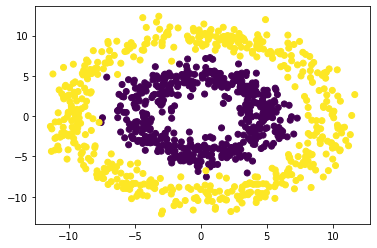

In [24]:
plt.scatter(X[:,0],X[:,1],c=T)
plt.show()

In [0]:
ones=np.array([[1]*N]).T
r=np.zeros((N,1))

In [0]:
for i in range(N):
  r[i]=np.sqrt(X[i,:].dot(X[i,:]))

In [0]:
Xb=np.concatenate((ones,r,X),axis=1)
w=np.random.rand(D+2)
z=Xb.dot(w)

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def entropy(T,Y):
  E=0
  for i in range(N):
    if T[i]==1:
      E-=np.log(Y[i])
    else:
      E-=np.log(1-Y[i])
  return E 


In [0]:
Y=sigmoid(z)

In [32]:
learning_rate=0.0001
error=[]
for i in range(5000):
  e=entropy(T,Y)
  error.append(e)
  if i%100==0:
    print(e)
  w+=learning_rate*(np.dot((T-Y).T,Xb)- 0.01*w)
  Y=sigmoid(Xb.dot(w))

1643.1993438160594
517.6631959464899
396.9748611254259
321.4853394856836
271.0585124630922
235.36443285559875
208.88775164477363
188.50253973785655
172.33170089068943
159.18938851610693
148.2932711916849
139.10786044037073
131.2549284468143
124.46002109068273
118.51928550059631
113.27819879443643
108.61752174673299
104.44377933660614
100.68265859063399
97.27433429905638
94.17009782179974
91.32988477405145
88.72043428325324
86.31389948702136
84.0867853887563
82.0191275403157
80.09385018295289
78.29625970766693
76.61364127443731
75.03493487453648
73.55047315145255
72.15176765590849
70.83133339788995
69.58254391343922
68.39951082090714
67.27698316437325
66.2102628468697
65.1951332256321
64.22779853551778
63.30483226842011
62.423132997896865
61.579886422946544
60.77253263058714
59.99873775687575
59.25636937035196
58.543475018238155
57.85826347002092
57.199088269805976
56.564433271636126
55.95289988355584


Text(0.5, 1.0, 'Cross entropy')

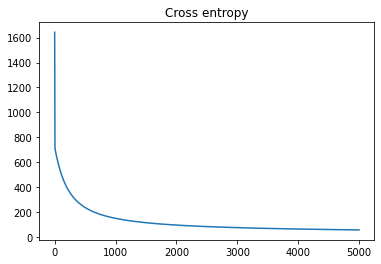

In [33]:
plt.plot(error)
plt.title('Cross entropy')

In [34]:
print('Final w: ',w)
print('Final classification rate: ',1-np.abs(T-np.round(Y)).sum()/N)

Final w:  [-1.17325261e+01  1.58951542e+00 -1.93228830e-03 -2.39376205e-02]
Final classification rate:  0.992
